<a href="https://colab.research.google.com/github/MarioAvolio/Amazon-Fine-Foods-reviews-Transformers-Text-Classification/blob/main/Amazon_Fine_Food_EDA_and_Balancing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset:

https://snap.stanford.edu/data/web-FineFoods.html

# EDA

In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt # plotting
import numpy as np

In [9]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [10]:
PATH_PROJ = "/content/drive/MyDrive/data-proj/"
# if not os.path.exists(PATH_PROJ):
#   PATH_PROJ = "/content/drive/MyDrive/shared/data-proj/"

PATH_PREPROCESSED_DATASET = PATH_PROJ+"food.csv"

In [11]:
df = pd.read_csv(PATH_PREPROCESSED_DATASET).sample(frac=0.2).reset_index(drop=True) # sampling a fraction of 20% to speed process
df

,productid,userid,score,text
0,B000Y8Y5F4,A2KRQN4HSPSHHP,5.0,"I found this while stationed in Italy, and rea..."
1,B003PFUNU4,A1NEBW18TTVJP8,5.0,Wonderful flavors at a good price all from the...
2,B001QE7Q4W,A1QP2GHTI063EF,5.0,"Cloie my Chocolate Lab loves them, but she lov..."
3,B0062A87HA,A7ANTV89DNXEQ,5.0,I give my dog pumpkin every to help control hi...
4,B003EML8PM,A338DYDNUPBXWJ,5.0,I am so glad we can get these from Amazon! Our...
...,...,...,...,...
7029,B001ELLB4S,AFA4G2GNKWUFH,1.0,Think carefully before ordering this product. ...
7030,B0062A87HA,A3HTTS8K7OCCZ0,2.0,I have purchased this pumpkin from Amazon to h...
7031,B004K30HO2,A2EV8A6DQ9EI1E,4.0,These coffee holders are much easier to use th...
7032,B007M83302,A3DUH8XLN7ZWVK,5.0,"I got a free sample of these once, and now--we..."


## Looking at the Class Distribution


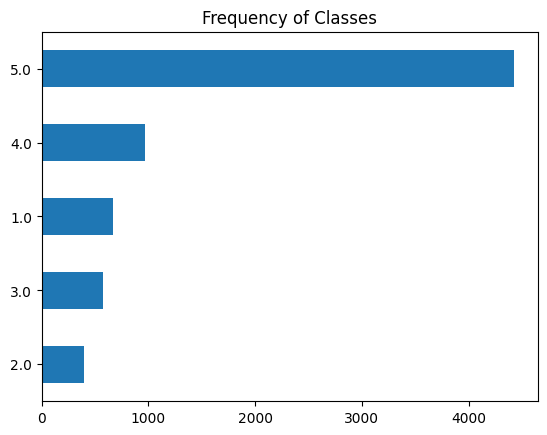

In [12]:
import matplotlib.pyplot as plt
df["score"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

In this case, we can see that the dataset is heavily imbalanced; There are several ways to deal with imbalanced data, including:
- Randomly oversample the minority class.
- Randomly undersample the majority class.
- Gather more labeled data from the underrepresented classes.

## How Long Are Our Review?
Transformer models have a maximum input sequence length that is referred to as the
maximum context size. For applications using DistilBERT, the maximum context size
is 512 tokens, which amounts to a few paragraphs of text. 

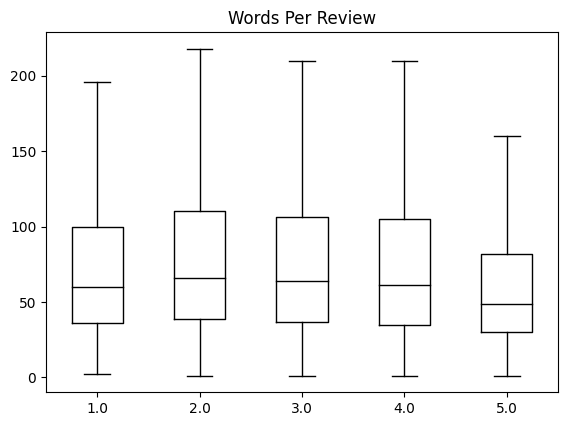

In [13]:
df["Words Per Review"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Review", by="score", grid=False,
showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

From the plot we see that for each emotion, most tweets are around 60 words long
and the longest tweets are well below DistilBERT’s maximum context size. Texts that
are longer than a model’s context size need to be truncated, which can lead to a loss in
performance if the truncated text contains crucial information; in this case, it looks
like that won’t be an issue.

Map target label to String
1. VERY NEGATIVE
2. NEGATIVE
3. NEUTRAL
4. POSITIVE
5. EXCELLENT
